<a href="https://colab.research.google.com/github/emisilva12/Coderhouse---Data-Science---Emiliano-Silva/blob/main/Desafio_CrossValidation_Emiliano_Silva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CrossValidation y mejora de modelos de ML


### Emiliano Silva - Comisión 39985
---
Como dicen muchos experimentados, es importante captar nuevos clientes, pero aún más importante es poder reternerlos, ya que recuperarlos requiere un esfuerzo mucho mayor.

Bajo este concepto, es imprescindible que en Goliath National Bank entendamos el comportamiento de nuestros clientes actuales y que semejanzas exiten con los que se dieron de baja para seguir siendo _legen... wait for it_.

Para eso es analizará una muestra de 10127 clientes entre los que hay aquellos que aún permanecen y otros que se han dado de baja.

El presente documento nos permitirá entender que variables son relevantes a la hora de detectar posibles bajas y, en consecuencia, poder actuar proactivamente. Para ello también se generará un modelo que permita predecir lo mismo a través de aprendizaje supervisado.

---
###Contexto empresarial

Sabemos que somos el banco más asombroso de todos, por eso no podemos permitirnos perder clientes.

Para esto, el equipo de data science, llevó a caba un análisis exhaustivo donde se proyectará a lo largo del paper.

---
###Problema comercial

Tal como lo explicabamos anteriormente, no podemos dejar de ser el banco más asombroso de todos y para eso debemos evitar que nuestros clientes migren hacia otros bancos, entendiendo por qué se dan de baja y actuando sobre dichas variables.

___
###Contexto análitico
El archivo a trabajar es un CSV que contiene datos de 10127 clientes en donde, además de encontrar etiquetados cuales ya se encuentran dados de bajo, podemos analizar todo tipo de datos como ingresos, gastos, tiempo desde su alta, estado civil, educación, etc.

Las tareas que se realizaran con los datos son las siguientes:

1. Importar y leer el archivo (se eliminan 2 columnas según sugerencia del sumistrador del dataset y se renombra la columna donde se encuentra el ID del cliente);

2. Se realiza un EDA con diferentes visualizaciones donde se evidencia la naturaleza de los datos;

3. Se realizan diferentes análisis para tratar de dar respuestas a las preguntas objetivos;

4. Se genera un modelo que permita predecir el estado de los clientes según las diferentes variables.

---
##Pregunta principal
###¿Por qué los clientes se dan de baja?

---
##Disparadores
1. ¿Se pueden observar comportamientos diferentes tanto en las variables categoricas como en las numéricas?

2. ¿Cuales variables poseen comportamientos diferentes entre los clientes que se dan de baja y los que no?

3. ¿Cuáles son las variables, y que valores adoptan, para clasificar en _"Attrited Customer"_ o _"Existing Customer"_?

4. ¿Podemos sacar más insights realizando un PCA?

5. ¿Qué tan buen predice el modelo?

##Desarrollo del equipo de DS
###Importación de librerías y base de datos

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import multiprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Datasets Silva'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Datasets Silva


In [ ]:
# Se eliminan las dos últimas columnas como sugiere el propietario de la base de datos
# Se renombra "CLIENTENUM" a "Client_ID" para hacerlo visualmente más amigable
df_creditcard = pd.read_csv('BankChurners.csv')
df_cc = df_creditcard[df_creditcard.columns[0:20]]
df_cc = df_cc.rename(columns={'CLIENTNUM':'Client_ID'})

###Descipción de columnas

**Client_ID**: Client number. Unique identifier for the customer holding the account

**Attrition_Flag**: Internal event (customer activity) variable - if the account is closed then 1 else 0

**Customer_Age**: Demographic variable - Customer's Age in Years

**Gender**: Demographic variable - M=Male, F=Female

**Dependent_count**: Demographic variable - Number of dependents

**Education_Level**: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)

**Marital_Status**: Demographic variable - Married, Single, Divorced, Unknown

**Income_Category**: Demographic variable - Annual Income Category of the account holder (< $$40K, $40K - $60K, $60K - $80K, $80K - $120K, > $120K)

**Card_Category**: Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

**Months_on_book**: Period of relationship with bank

**Total_Relationship_Count**: Total no. of products held by the customer

**Months_Inactive_12_mon**: No. of months inactive in the last 12 months

**Contacts_Count_12_mon**: No. of Contacts in the last 12 months

**Credit_Limit**: Credit Limit on the Credit Card

**Total_Revolving_Bal**: Total Revolving Balance on the Credit Card

**Avg_Open_To_Buy**: Open to Buy Credit Line (Average of last 12 months)

**Total_Amt_Chng_Q4_Q1**: Change in Transaction Amount (Q4 over Q1)

**Total_Trans_Amt**: Total Transaction Amount (Last 12 months)

**Total_Trans_Ct**: Total Transaction Count (Last 12 months)

**Total_Ct_Chng_Q4_Q1**: Change in Transaction Count (Q4 over Q1)

**Avg_Utilization_Ratio**: Average Card Utilization Ratio

##Análisis Exploratorio de Datos

In [ ]:
df_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client_ID                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
df_cc

,Client_ID,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722


In [ ]:
# Valores unicos de ID (coincide con la cantidad total)
print(f"Cantidad de ID's unicos: {df_cc['Client_ID'].nunique()}")
print(f"Cantidad de entradas totales: {df_cc['Client_ID'].count()}")
print(f"Repetidos: {df_cc['Client_ID'].count() - df_cc['Client_ID'].nunique()}")

Cantidad de ID's unicos: 10127
Cantidad de entradas totales: 10127
Repetidos: 0


In [ ]:
df_cc.describe()

,Client_ID,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000


In [ ]:
# Total de valores nulos / (filas * columnas)
print(f"Porcentaje de valores nulos: {int(pd.isnull(df_cc).sum().sum()/(df_cc.shape[0]*df_cc.shape[1])*100)}%")

Porcentaje de valores nulos: 0%


In [ ]:
# Cantidad de clientes actuales y que se dieron de baja
print("Cantidad de clientes que están dados de alta (Existing Customer) y que se dieron de baja (Attited Customer)")
print("----------------------------------")
df_cc['Attrition_Flag'].value_counts()

Cantidad de clientes que están dados de alta (Existing Customer) y que se dieron de baja (Attited Customer)
----------------------------------


Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [ ]:
# Porcentaje de clientes que siguen dados de alta
print(f"Porcentaje de clientes que se mantienen dados de alta: {round(df_cc['Attrition_Flag'].value_counts()[0]/df_cc.shape[0]*100, 1)}%")

# Porcentaje de clientes que se dieron de baja
print(f"Porcentaje de clientes que se dieron de baja: {round(df_cc['Attrition_Flag'].value_counts()[1]/df_cc.shape[0]*100, 1)}%")

Porcentaje de clientes que se mantienen dados de alta: 83.9%
Porcentaje de clientes que se dieron de baja: 16.1%


In [ ]:
# Se ven las estadísticas por grupo de interés
for i in df_cc:
  print(f"Estadistica para: {i} \n")
  print(df_cc[i].groupby(df_cc['Attrition_Flag']).describe().T)
  print("\n----------------------------------------------------\n")

Estadistica para: Client_ID 

Attrition_Flag  Attrited Customer  Existing Customer
count                1.627000e+03       8.500000e+03
mean                 7.352614e+08       7.399272e+08
std                  3.557725e+07       3.710723e+07
min                  7.080833e+08       7.080821e+08
25%                  7.123713e+08       7.132197e+08
50%                  7.165644e+08       7.181643e+08
75%                  7.683737e+08       7.783415e+08
max                  8.282949e+08       8.283431e+08

----------------------------------------------------

Estadistica para: Attrition_Flag 

Attrition_Flag  Attrited Customer  Existing Customer
count                        1627               8500
unique                          1                  1
top             Attrited Customer  Existing Customer
freq                         1627               8500

----------------------------------------------------

Estadistica para: Customer_Age 

Attrition_Flag  Attrited Customer  Existing Custom

In [ ]:
# Gráfico con la cantidad de clientes activos y dados de baja
# Se da vuelta el orden para mantener los colores a lo largo del notebook
px.bar(df_cc.groupby('Attrition_Flag').count().reset_index()[::-1], x = "Attrition_Flag", y = "Client_ID", color = "Attrition_Flag",
      title = 'Cantidad de clientes dados de alta vs. dados de baja',
      labels={'Attrition_Flag':'Estado de los clientes', 'Client_ID':'Cantidad de clientes'})

En un primer "análisis rápido" podemos concluir que tenemos desbalanceados los datos. Esto es importante tenerlo en cuenta a la hora de entrenar modelos que permitan predecir cuando un cliente podría abandonar el banco ya que si suponemos en el caso más extremista un modelo que diga que ningún cliente abandona el banco, tendría un acierto del casi 84%.

####Variables categóricas y numéricas

En primer instancia relizaremos un gráfico de barras para cada variable dividiendo en colores los clientes que abandonaron y los que continúan con el fin de entender el comportamiento de cada variable.

En una primera impresión pareciera haber dos medias diferentes, una para los que abandonan y otra para los que siguen, en los últimos 3 graficos realizados.

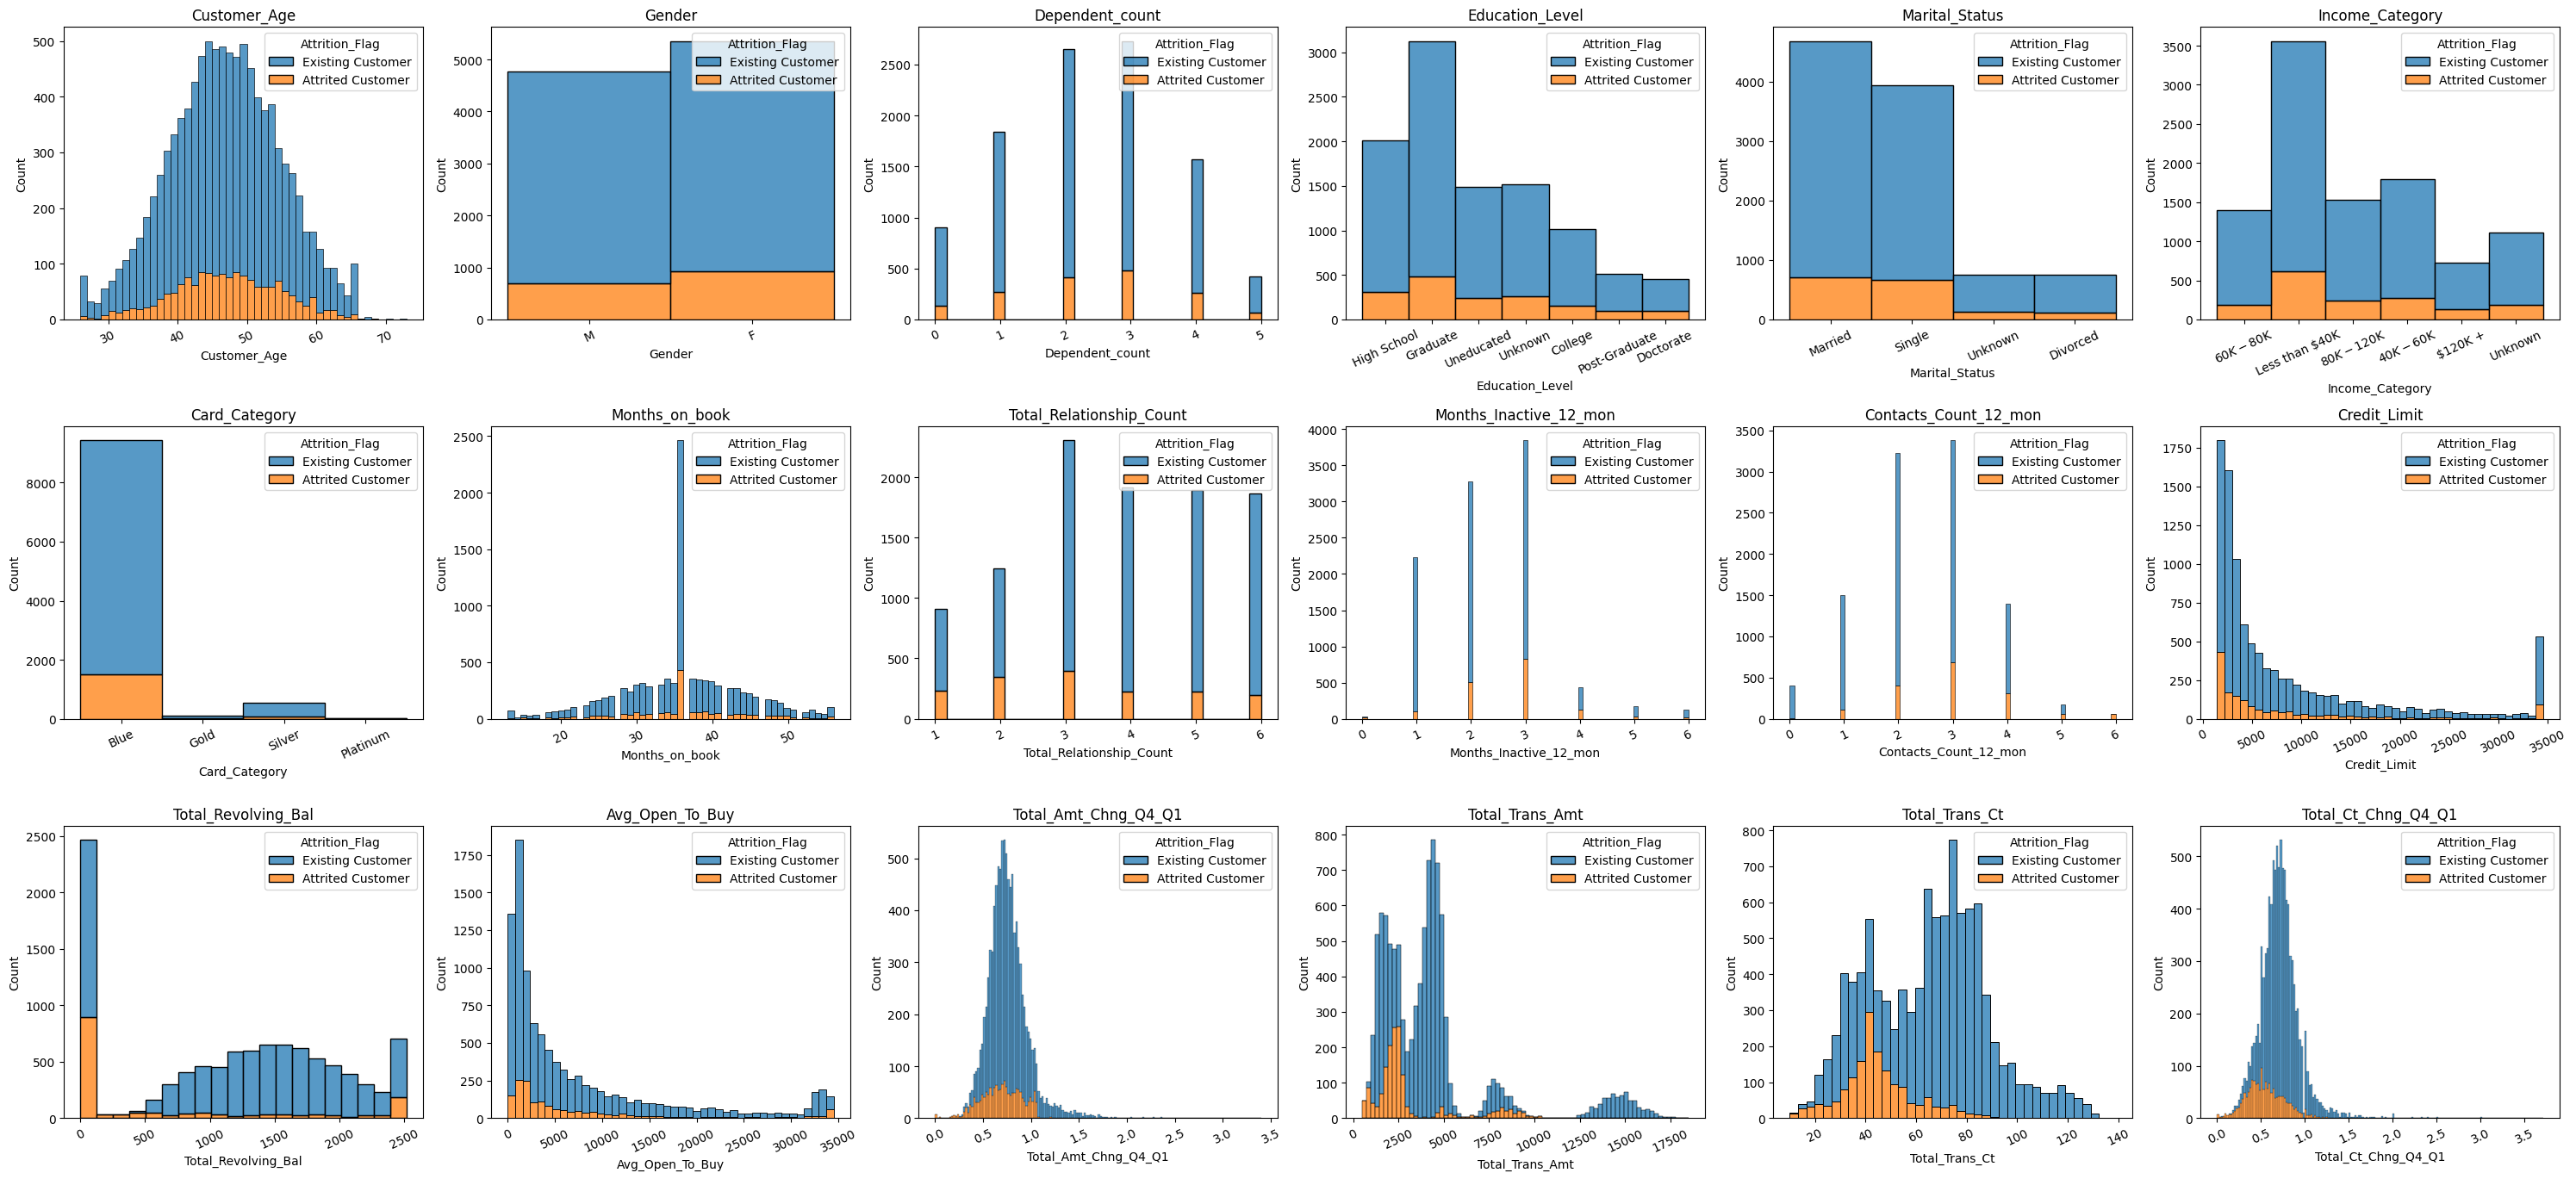

In [ ]:
# Se crea una copia para no modificar el DF original
Variables = df_cc.copy()

# Se crea la variable "c" para utilizar como contador y posicionar las imagenes en la "figura"
c=1

# Se crea la figura en matplot y los graficos (en seaborn) dentro de la misma
# Se busca repartir todos los gráficos en 6 columnas
fig = plt.figure(figsize=(30,15))
for i in df_cc:
  if (i != 'Attrition_Flag' and i != 'Client_ID'):
    plt.subplot(df_cc.shape[1]//6, 6, c)
    plotVariables = df_cc[['Attrition_Flag',i]]
    f = plt.gca()
    f.set_title(i)
    sns.histplot(data=plotVariables, x = i, hue = 'Attrition_Flag', multiple="stack")
    plt.xticks(rotation=25)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    c+=1

A continuación se dividen los gráficos para cada una de las segmentaciones en cuestión, en dónde podemos ver con mayor claridad que las medias del gráfico "Total_Trans_Amt", "Total_Trans_Ct" y "Total_Ct_Chng_Q4_Q1" son bimodales porque responden a dos distibuciones con modas bien diferentes, al menos en los análisis gráficos.

Más adelante analizaremos por la vía de test de hipótesis si esto que estamos suponiendo gráficamente se corresponde de forma matemática.

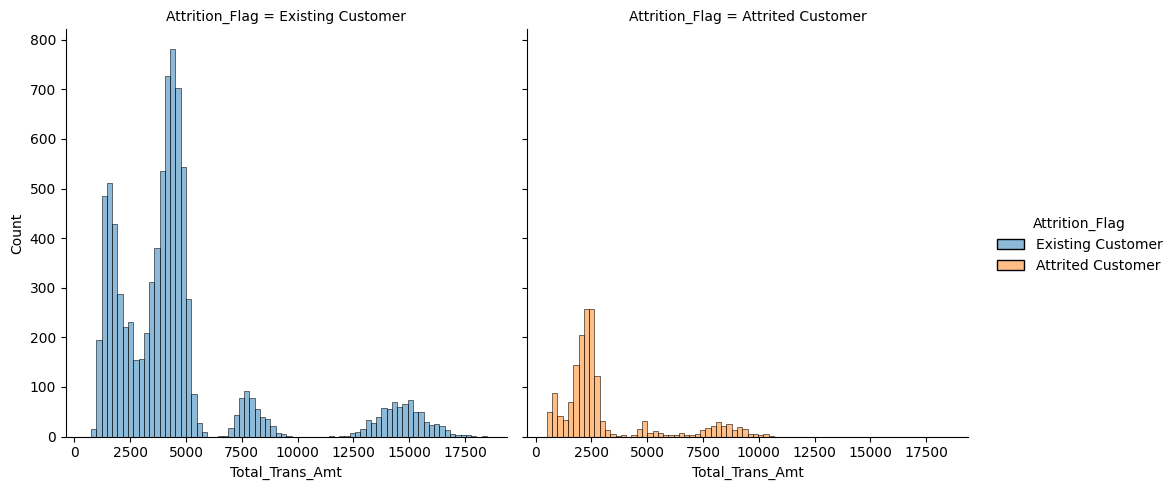

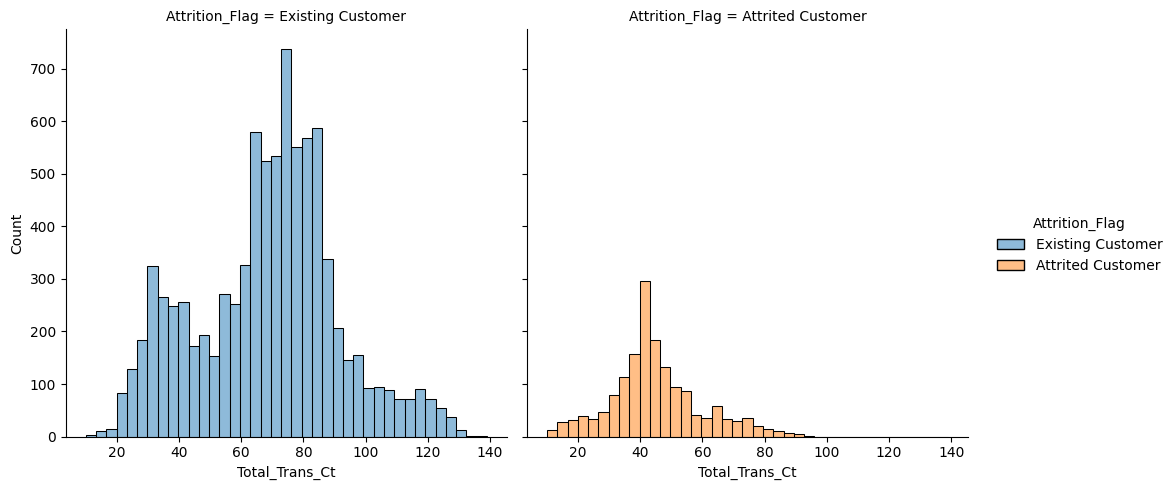

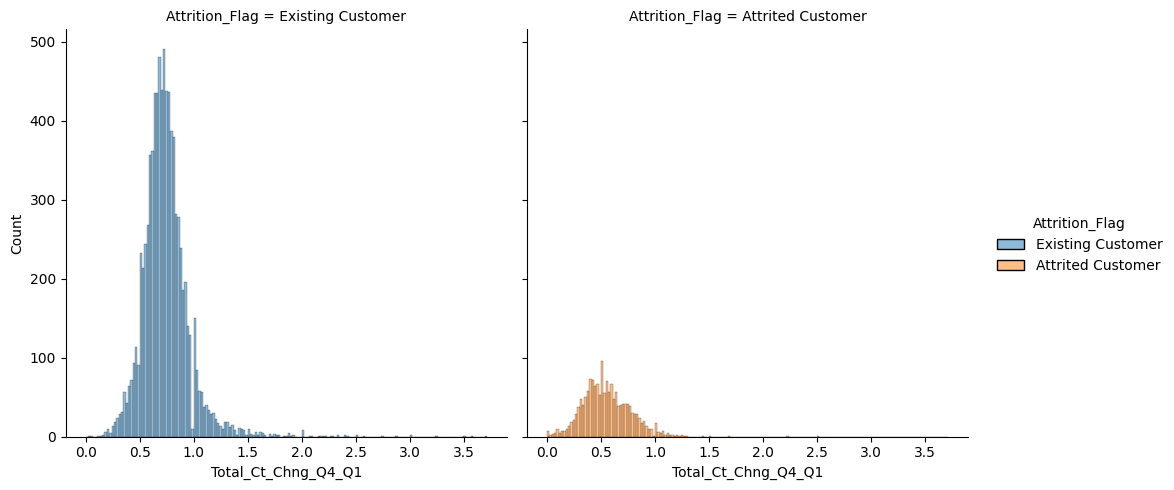

In [ ]:
# Se crea una base de datos con solo los 3 gráficos de interés
Variables = df_cc[['Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']]


# Se crea la variable "c" para utilizar como contador y posicionar las imagenes en la "figura"
c=1

# Se crea la figura en matplot y los graficos (en seaborn) dentro de la misma
for i in Variables:
  if (i != 'Attrition_Flag' and i != 'Client_ID'):
    plotVariables = df_cc[['Attrition_Flag',i]]
    sns.displot(data=plotVariables, x = i, hue = 'Attrition_Flag', col="Attrition_Flag")

    c+=1

####Variables numéricas

Para el análisis de variables numéricas se escogieron boxplots para entender la dispersión y comportamiento de los datos según cada variable y categoría.

Aquí podemos observar como variables con comportamientos diferentes a varias de ellas (hablando siempre de los clientes que abandonaron):
* **Dependent_count**: posee un dominio más acotado en los clientes que abandoran que en los que no
* **Total_Relationship_Count**: presenta una varianza mayor para el mismo rango de datos con una tendecia a poseer datos más bajos (mediana menor)
* **Months_Inactive_12_mon**: posee un rango de datos menos disperso
* **Contacs_Count_12_mon**: es la contraria a la anterior
* **Total_Revolving_Bal**: concentra todos los valores cerca del 0 mientras que los clientes que siguen parecen estar más centradas la mediana con la media

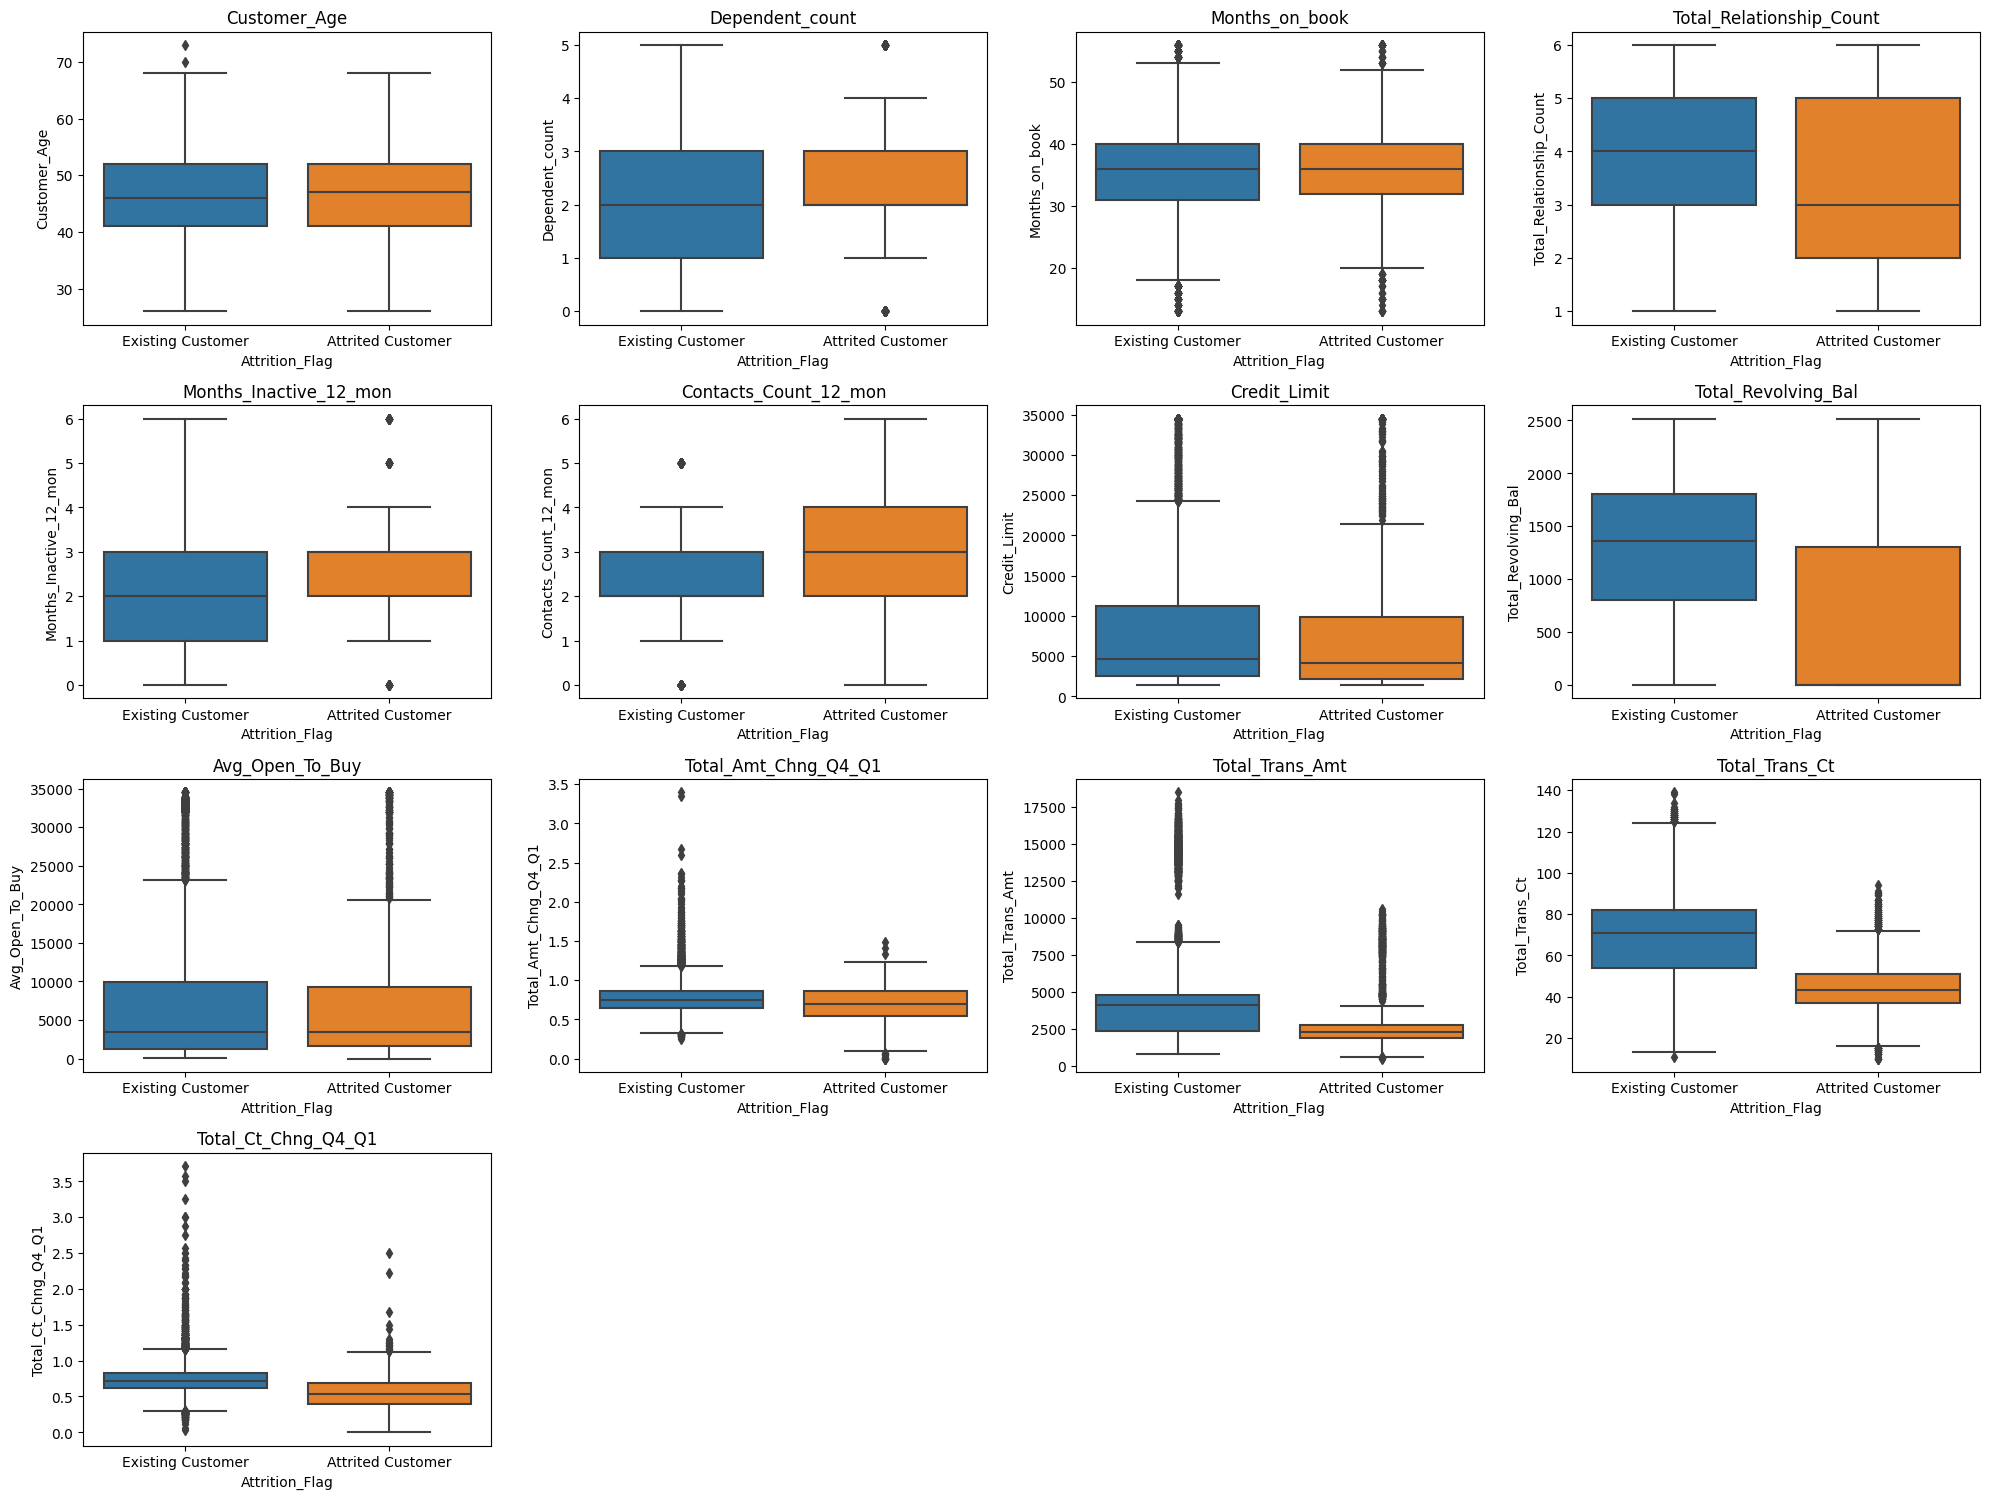

In [ ]:
# Se crea una copia para no modificar el DF original
Variables = df_cc.copy()

# Se toman solo las variables que son de tipo numérico
Variables = Variables.select_dtypes(['int64', 'float64'])


# Se crea la variable "c" para utilizar como contador y posicionar las imagenes en la "figura"
c=1

# Se crea la figura en matplot y los graficos (en seaborn) dentro de la misma
# Se busca repartir todos los gráficos en 4 columnas
fig = plt.figure(figsize=(20,20))
for i in Variables:
  if (i != 'Attrition_Flag' and i != 'Client_ID'):
    plt.subplot(df_cc.shape[1]//4, 4, c)
    plotVariables = df_cc[['Attrition_Flag',i]]
    f = plt.gca()
    f.set_title(i)
    sns.boxplot(x = 'Attrition_Flag', y = i, data=plotVariables)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    c+=1

In [ ]:
px.scatter(df_cc, x="Total_Trans_Ct", y="Total_Trans_Amt", color="Attrition_Flag", opacity=0.5)

Entre los datos más llamativos, encontramos la relación entre "Total_Trans_Amt" y "Total_Trans_Ct" en donde vemos que se comportan de manera similar, pero los clientes que tienden a bandonar se encuentran contenidos en un cuadrado imaginaro delimitado por las rectas _x = 100_ e _y = 12000_.

Ademas crece al cuadrado más rápidamente los clientes que abandonaron por lo que podemos suponer, apriori, que los mismos tienden a gastar más en menos transacciones y que los clientes que poseen más de 150 transacciones y montos por encima de 12500 es poco probable que abandonen ya que no se han registrado datos así en la muestra tomada.

####Matriz de correlaciones

Siempre es bueno tener una noción de como se comportan unas variables con respecto a las otras para saber entenerder cuales variables pueden ser redundantes (como Credit_Limit y Avg_Open_To_Buy que tienen una relación perfecta).

In [ ]:
correlation = df_cc.corr(numeric_only = 'deprecated').values # obtener los numeros de la correlacion
names = list(df_cc.corr(numeric_only = 'deprecated').columns.values) # obtener los nombres de las columnas
correlation_text = np.around(correlation, decimals=2) # para mejorar la visualización usando solo 2 decimales
ff.create_annotated_heatmap(correlation, annotation_text=correlation_text, x = names,y = names, colorscale='solar')


### 1. ¿Se pueden observar comportamientos diferentes tanto en las variables categoricas como en las numéricas?

La respuesta corta es sí. En las variables categóricas podemos observar un corrimiento de la media entre los "Existing" y los "Attirted" para las variables _Total_Trans_Amt_, _Total_Trans_Ct_ y _Total_Ct_Chng_Q4_Q1_, además de que en un análisis extra observamos como los clientes que abandonaron poseen una dispersión más contenida en el gráfico _Total_Trans_Amt_ vs. _Total_Trans_Ct_.

Por otro lado, volvemos a remarcar lo visto en las variables numéricas a través de los gráficos (siempre poniendo foco en los clientes que abandonaron):
* **Dependent_count**: posee un dominio más acotado en los clientes que abandoran que en los que no
* **Total_Relationship_Count**: presenta una varianza mayor para el mismo rango de datos con una tendecia a poseer datos más bajos (mediana menor)
* **Months_Inactive_12_mon**: posee un rango de datos menos disperso
* **Contacs_Count_12_mon**: es la contraria a la anterior
* **Total_Revolving_Bal**: concentra todos los valores cerca del 0 mientras que los clientes que siguen parecen estar más centradas la mediana con la media

##Test de hipótesis

Tal como vimos de formá gráfica, pareciera haber comportamientos diferentes en las variables 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1'. Ahora es importante validar esto de forma matemática para estar seguros que dicha afirmación sea realmente cierta.

Para eso plantearemos como $H_0$ que la media para cada variable de los clientes que abandonaron es igual a la media de los que aún lo son y veremos cuales son aquellas que no pasan cumplen con la misma.

$H_0:\mu_i=\mu_j$

In [ ]:
# Se crea una copia para no modificar el DF original
Variables = df_cc.copy()

# Se toman solo las variables que son de tipo numérico
Variables = Variables.select_dtypes(['int64', 'float64'])

# Se crean dos dataframes diferentes para después comparar las medias entre sí
Attrited = df_cc[df_cc.Attrition_Flag == 'Attrited Customer']
Existing = df_cc[df_cc.Attrition_Flag == 'Existing Customer']

# Se analiza la media de cada una de las categorías y se "imprimen" las variables en donde se rechaza Ho
print('Variables donde se rechaza Ho')
print('------------------------------------------ \n')
for i in Variables:
  if i != 'Client_ID':
    statistic, pvalue = stats.ttest_ind(Attrited[i], Existing[i], equal_var=False)
    if pvalue < 0.05:
      print(i, '\n', '    Estadistico:',round(statistic,3),'p-valor:', round(pvalue,3),'\n')

Variables donde se rechaza Ho
------------------------------------------ 

Total_Relationship_Count 
     Estadistico: -14.944 p-valor: 0.0 

Months_Inactive_12_mon 
     Estadistico: 16.862 p-valor: 0.0 

Contacts_Count_12_mon 
     Estadistico: 20.901 p-valor: 0.0 

Credit_Limit 
     Estadistico: -2.401 p-valor: 0.016 

Total_Revolving_Bal 
     Estadistico: -24.047 p-valor: 0.0 

Total_Amt_Chng_Q4_Q1 
     Estadistico: -13.423 p-valor: 0.0 

Total_Trans_Amt 
     Estadistico: -22.686 p-valor: 0.0 

Total_Trans_Ct 
     Estadistico: -54.142 p-valor: 0.0 

Total_Ct_Chng_Q4_Q1 
     Estadistico: -30.607 p-valor: 0.0 



###2. ¿Cuales variables poseen comportamientos diferentes entre los clientes que se dan de baja y los que no?

Como podemos observar, además de las tres variables que habíamos detectado de forma gráfica, hay diversas variables en donde encontramos que la hipotesis nula debe ser rechazada. Con esto podemos concluir que tenemos medias diferentes entre los clientes que están dados de baja y los que siguen de alta, por lo que el comportamiento entre ambos es claramente diferente.

Los valores "gravitan" al rededor de diferentes puntos o medias, por lo que podrían ser variables interesantes a explorar con mayor profundidad. Esto ocurre incluso en el "Credit_Limit" que si bien no da 0, el nivel de p-valor es menor al 0.05, por lo que también rechazamos la $H_0$.

## Resumen y primeros insights

###3. ¿Cuáles son las variables, y que valores adoptan, para clasificar en _"Attrited Customer"_ o _"Existing Customer"_?

Tenemos una base de datos con una amplia diferencia entre clientes que aún siguen activos (84%) y los que se dieron de baja (16%)

*   Si queremos crear modelos predictivos, tenemos que tener precaución y buscar conseguir un "accuracy" mayor a 84%.

---

Hay 3 variables que destacan por tener medias diferentes según analicemos el estado de los clientes:
*   “Total_Trans_Amt” (4650 vs. 3095)
*   “Total_Trans_Ct” (70 vs. 45)
*   “Total_Ct_Chng_Q4_Q1” (0.75 vs 0.55)

---

A estas 3 variables detectadas en el EDA se le suman otras 6 que se detectaron mediante la prueba de hipótesis presentando como $H_0:\mu_i=\mu_j$. Dichas variables adicionales son:
*   “Total_Relationship_Count”
*   “Credit_Limit"
*   "Total_Revolving_Bal”
*   “Total_Amt_Chng_Q4_Q1”

---

Cuando comparamos la cantidad y el monto de las transacciones podemos observar que ningún cliente que haya realizado más de 100 transacciones y montos mayores a 10k ha abandonado la institución

---
Se observa una fuerte relación entre 3 pares de variables:
*   “Total_Trans_Ct” - “Total_Trans_Amt” (0.81)
*   “Months_on_book” - “Customer_Age” (0.79)
*   “Credit_Limit” - “Avg_Open_To_Buy” (1.00)


###4. ¿Podemos sacar más insights realizando un PCA?

La respuesta corta es no ya que el PCA necesitaba 4 variables para explicar el 50% del modelo. Sacarle los outliers tampoco modificaba mucho el resultado ya que hay muy pocos (1.11%).

Por lo mencionado y lo complejo que puede resultar analizar las nuevas variables sintéticas es que se optó por no introducirlo. Se tiene una notebook llamada 'Anexo I - PCA' donde se puede observar el desarrollo del mismo.

##Modelo de clasificación

Buscamos un modelo que permita predecir cuales clientes de los que aún permanecen entran en la categoría de "Attrited Customer" ya que sobre estós habría que actuar.

Para eso vamos a:
1. Realizar un Random Forest sin modificar los hiperparámetros;
2. Convertir las variables categóricas a dummies;
3. Separar los datos en train, test y validation;
4. Realizar un "radom forest" con Cross Validation;
5. Evaluar ambos modelos y comprar su Recall;
6. Realizar las curvas ROC-AUC y Precision-Recall;
7. Comprar ambos modelos y sacar conclusiones.

### Random Forest sin CV

In [ ]:
X_sin_cv = df_cc.select_dtypes(['int64', 'float64']).drop(columns=['Client_ID'])
y_sin_cv = df_cc['Attrition_Flag']

In [ ]:
# Separamos los datos para el entrenamiento y el testeo
X_train_sin_cv, X_test_sin_cv, y_train_sin_cv, y_test_sin_cv = train_test_split (X_sin_cv, y_sin_cv, test_size = 0.3, shuffle = True, random_state = 0, stratify = y_sin_cv)

In [ ]:
clf_sin_cv = RandomForestClassifier(random_state = 123)
rf_sin_cv = clf_sin_cv.fit(X_train_sin_cv, y_train_sin_cv)

In [ ]:
y_pred_sin_cv = clf_sin_cv.predict(X_train_sin_cv)

### Calidad de predicción

Aquí es donde veremos realmente que tan bueno es nuestro modelo. Al querer tomar políticas sobre los clientes que potencialmente podrían abandonar, preferimos tener falsos positivos (Predict: Attrited, True: Existing) sobre falsos negativos (Predict: Existing, True: Attrited). Por dicho motivo, nuestro valor a mirar será el "recall".

Matriz de cofusión del modelo original:


<Figure size 1000x600 with 0 Axes>

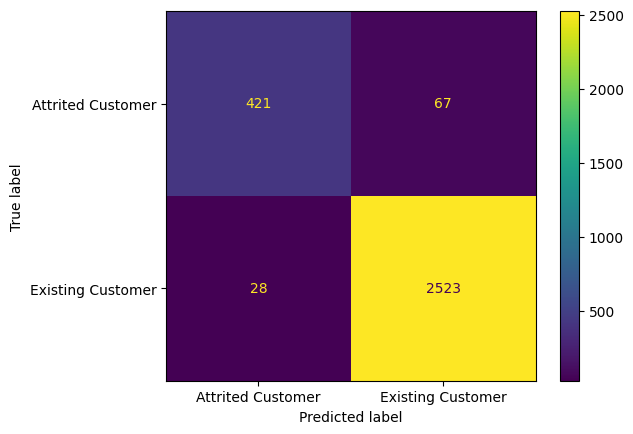

In [ ]:
# Error de test del modelo original
predicciones_sin_cv = clf_sin_cv.predict(X = X_test_sin_cv,)

print("Matriz de cofusión del modelo original:")
cm = confusion_matrix(
        y_true    = y_test_sin_cv,
        y_pred    = predicciones_sin_cv)

plt.figure(figsize=(10,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df_cc['Attrition_Flag'].unique()[::-1])
disp.plot()
plt.show()

In [ ]:
print(
    classification_report(
        y_true    = y_test_sin_cv,
        y_pred    = predicciones_sin_cv
    )
)

                   precision    recall  f1-score   support

Attrited Customer       0.94      0.86      0.90       488
Existing Customer       0.97      0.99      0.98      2551

         accuracy                           0.97      3039
        macro avg       0.96      0.93      0.94      3039
     weighted avg       0.97      0.97      0.97      3039



Tal como podemos ver en la matriz de confusión, como en las metricas arrojadas, estamos ante un modelo que clasifica de muy buena nuestra variable objetivo. Además de tener un muy buen recall tenemos un accuracy altísimo (categorizamos bien el 97% de los casos) y estadísticas en general altas con el agregado de que tenemos un dataset desbalanceado.

Ahora analizaremos si realizando un cross validation y utilizando variables dummies podemos mejorar dichos parámetros.

### Random Forest con CV

In [ ]:
# Pasamos las variables categóricas a dummies menos 'Attrition_Flag' ya que es nuestra variable objetivo
df_cc_cat = df_cc.select_dtypes(['object']).drop(columns=['Attrition_Flag'])
df_cc_dum = pd.get_dummies(df_cc_cat)
df_cc_dum

# Filtramos las variables numéricas y sacamos los ID ya que son valores únicos que no agregan información
df_cc_num = df_cc.select_dtypes(['int64', 'float64']).drop(columns=['Client_ID'])

# Concatenamos las nuevas columnas dummies con las variables numéricas originales y la columna objetivo
df_cc_new = pd.concat([df_cc['Attrition_Flag'], df_cc_dum, df_cc_num],axis=1)

df_cc_new

,Attrition_Flag,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,...,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
0,Existing Customer,0,1,0,0,0,1,0,0,0,...,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625
1,Existing Customer,1,0,0,0,1,0,0,0,0,...,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714
2,Existing Customer,0,1,0,0,1,0,0,0,0,...,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333
3,Existing Customer,1,0,0,0,0,1,0,0,0,...,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333
4,Existing Customer,0,1,0,0,0,0,0,1,0,...,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,0,1,0,0,1,0,0,0,0,...,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857
10123,Attrited Customer,0,1,0,0,0,0,0,0,1,...,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683
10124,Attrited Customer,1,0,0,0,0,1,0,0,0,...,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818
10125,Attrited Customer,0,1,0,0,1,0,0,0,0,...,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722


In [ ]:
# Preparación de datos
X = df_cc_new.loc[:,df_cc_new.columns!='Attrition_Flag']
y = df_cc_new['Attrition_Flag']

### Separación de las variables de train, test y validation

In [ ]:
# Separamos los datos para el entrenamiento, el testeo y validación
X_train, X_validation_test, y_train, y_validation_test = train_test_split (X, y, test_size = 0.3, shuffle = True, random_state = 0, stratify = y)
X_test, X_validation, y_test, y_validation = train_test_split (X_validation_test, y_validation_test, test_size = 0.3, shuffle = True, random_state = 5, stratify = y_validation_test)

### Generación del modelo de "Random Forest"

#### Optimización de parámetros

Se busca los hiperparámetros que maximicen el valor del AUC ya que dicha métrica se utiliza para medir el rendimiento del modelo (utilizando recall como scoring daba un resultado peor)

In [ ]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid =    {'n_estimators': [200, 500, 800],
                 'max_features': range(1,18,8),
                 'max_depth'   : range(1,36,5),
                 'criterion'   : ['gini', 'entropy', 'log_loss']
                }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = RandomizedSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_distributions = param_grid,
        scoring    = 'roc_auc',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123),
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X_train, y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(5)

,param_n_estimators,param_max_features,param_max_depth,param_criterion,mean_test_score,std_test_score,mean_train_score,std_train_score
7,500,9,21,log_loss,0.990192,0.002118,1.00000,0.000000e+00
2,200,9,26,entropy,0.989944,0.002151,1.00000,4.053961e-17
9,200,17,26,entropy,0.989791,0.002187,1.00000,0.000000e+00
0,500,17,11,gini,0.988441,0.002382,0.99992,2.173275e-05
1,500,1,31,log_loss,0.962726,0.004904,1.00000,4.053961e-17


In [ ]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("--------------------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("--------------------------------------------------")
print(grid.best_params_)
print("Score", grid.scoring, ":", grid.best_score_)

--------------------------------------------------
Mejores hiperparámetros encontrados (cv)
--------------------------------------------------
{'n_estimators': 500, 'max_features': 9, 'max_depth': 21, 'criterion': 'log_loss'}
Score roc_auc : 0.9901920938955675


In [ ]:
# Se obtiene el modelo con los mejores parámetros para ver la importancia de cada columna en el mismo
modelo_final = grid.best_estimator_

### Obtención de variables relevantes

Para oprimizar memoria y reducir el ruido, se toman solo los predictores con una importancia mayor al 1%

Para esto, primero debemos calcular la importancia de cada uno y luego filtrar

In [ ]:
importancia_predictores = pd.DataFrame(
                            {'Predictor': X_train.columns.values,
                             'Importancia [%]': modelo_final.feature_importances_}
                            )

importancia_predictores['Importancia [%]'] = importancia_predictores['Importancia [%]']*100
filtro = importancia_predictores[modelo_final.feature_importances_ != 0]
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
filtro_ordenado = filtro.sort_values('Importancia [%]', ascending=False)
filtro_ordenado

Importancia de los predictores en el modelo
-------------------------------------------


,Predictor,Importancia [%]
33,Total_Trans_Amt,21.454043
34,Total_Trans_Ct,18.732956
30,Total_Revolving_Bal,12.916322
35,Total_Ct_Chng_Q4_Q1,9.563664
32,Total_Amt_Chng_Q4_Q1,6.971095
26,Total_Relationship_Count,6.726250
31,Avg_Open_To_Buy,3.428231
29,Credit_Limit,3.338948
23,Customer_Age,3.079065
27,Months_Inactive_12_mon,2.556122


In [ ]:
# Unificamos los valores de train y test para tener más datos para re-entrenar el modelo
X_test_train_sinfiltrar = pd.concat([X_test, X_train])
y_test_train = pd.concat([y_test, y_train])

# Nos quedamos solo con las columnas que fueron significantes para el entrenamiento del primer modelo y disminuir el ruido
a = filtro_ordenado[filtro_ordenado['Importancia [%]'] > 1].iloc[:,0]
X_test_train = X_test_train_sinfiltrar[a]
X_test_train

,Total_Trans_Amt,Total_Trans_Ct,Total_Revolving_Bal,Total_Ct_Chng_Q4_Q1,Total_Amt_Chng_Q4_Q1,Total_Relationship_Count,Avg_Open_To_Buy,Credit_Limit,Customer_Age,Months_Inactive_12_mon,Months_on_book,Contacts_Count_12_mon,Dependent_count
7474,4610,78,1062,0.773,0.729,6,2261.0,3323.0,34,2,17,1,2
7812,4068,61,0,0.694,0.797,2,3659.0,3659.0,42,1,31,1,2
112,1251,35,1674,0.346,0.588,5,1589.0,3263.0,42,1,36,2,4
872,1174,27,1095,0.800,0.947,3,3155.0,4250.0,59,3,49,3,0
2768,2351,42,0,0.312,0.804,6,4152.0,4152.0,26,3,36,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4858,4049,71,2337,0.690,0.790,6,7217.0,9554.0,48,1,29,2,2
2304,4189,74,1319,0.609,0.768,4,1305.0,2624.0,41,2,34,2,3
2729,2712,64,1608,0.778,1.243,6,3632.0,5240.0,29,3,13,5,0
8568,2461,54,2517,0.742,0.636,2,744.0,3261.0,29,1,19,2,0


In [ ]:
# Modelo ajustado a los hiperparámetros obtenidos y los predictores de importancia
clf_ajustado = RandomForestClassifier(
    criterion = grid.best_params_['criterion'],
    max_depth = grid.best_params_['max_depth'],
    max_features = grid.best_params_['max_features'],
    random_state = 1234)

rf_final = clf_ajustado.fit(X_test_train, y_test_train)

In [ ]:
# Obtener predicciones
y_pred = clf_ajustado.predict(X_test_train)

### Calidad de predicción modelo con CV

Matriz de cofusión del modelo original:


<Figure size 1000x600 with 0 Axes>

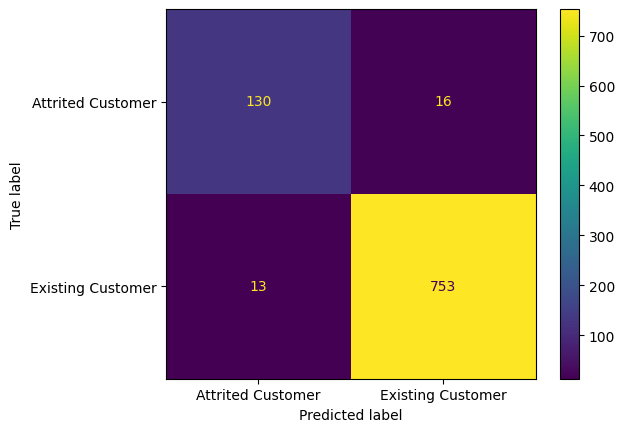

In [ ]:
# Error de test del modelo original
X_validation_filtrado = X_validation[a]
predicciones = clf_ajustado.predict(X = X_validation_filtrado,)

print("Matriz de cofusión del modelo original:")
cm = confusion_matrix(
        y_true    = y_validation,
        y_pred    = predicciones)

plt.figure(figsize=(10,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df_cc['Attrition_Flag'].unique()[::-1])
disp.plot()
plt.show()

In [ ]:
print(
    classification_report(
        y_true = y_validation,
        y_pred = predicciones
    )
)

                   precision    recall  f1-score   support

Attrited Customer       0.91      0.89      0.90       146
Existing Customer       0.98      0.98      0.98       766

         accuracy                           0.97       912
        macro avg       0.94      0.94      0.94       912
     weighted avg       0.97      0.97      0.97       912



### Comparando modelos

Como podemos observar, si comparamos el accuracy entre los dos modelos, permanece igual (97% en ambos casos, mejor que el 84% del caso base). Pero lo que realmente nos importa es el incremento en el valor de recall de los Attrited Customer que es el 'score' más importante para nuestro caso. Recordemos que esto es poque deseabamos bajar el error del Tipo II, es decir, disminuir la cantidad de falsos negativos, ya que la idea del modelo es poder mantener la mayor cantidad de clientes posibles por más que eso signifique tener un mayor costo por "aumentar" la cantidad de error tipo I, es decir el valor de "precision".

Volviendo a nuestro dato te interés, el recall, pasamos de un 0.86 a un 0.89 por lo que mejoramos nuestro modelo con las herramientas _"adicionales"_ aplicadas. Mientras que en el precision tenemos una desmejoría también de 0.03 (0.94 vs. 0.91) y el f1-score se mantiene igual (0.90 vs. 0.90).


### Curvas ROC y AUC

Al tener un problema de clasificación binaria, vamos a aplicar la curva ROC para poder ver gráficamente que modelo es mejor (con o sin CV). Luego mediremos el AUC y las compararemos para tener el resultado matemático de la comparación.



In [ ]:
con_cv_proba = rf_final.predict_proba(X_validation_filtrado)[:,0]
sin_cv_proba = clf_sin_cv.predict_proba(X_test_sin_cv)[:,0]

In [ ]:
sin_cv_fpr, sin_cv_tpr, sin_cv_umbral = roc_curve(y_test_sin_cv, sin_cv_proba, pos_label='Attrited Customer')
con_cv_fpr, con_cv_tpr, con_cv_umbral = roc_curve(y_validation, con_cv_proba, pos_label='Attrited Customer')

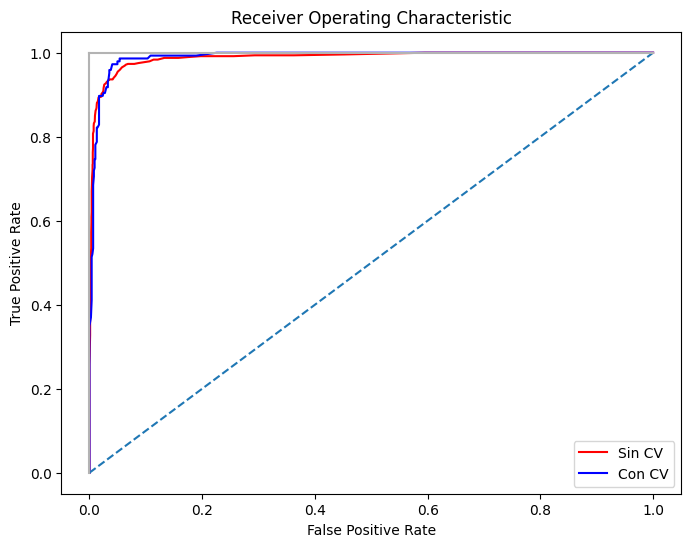

In [ ]:
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic')
plt.plot(sin_cv_fpr, sin_cv_tpr, color = "red", label = "Sin CV")
plt.plot(con_cv_fpr, con_cv_tpr, color = "blue", label = "Con CV")
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

Como se puede observar gráficamente, ambas curvas se encuentran cerca del punto [0,1] por lo que podemos concluir que ambos modelos son muy buenos prediciendo.

Además, si observamos el cálculo del área bajo la curva de a continuación, ambas curvas son prácticamente iguales y cercanas a 1.

In [ ]:
print('roc_auc_score para RF con CV: ', 1-roc_auc_score(y_validation, con_cv_proba))
print('roc_auc_score para RF sin CV: ', 1-roc_auc_score(y_test_sin_cv, sin_cv_proba))
print('Diferencia de  roc_auc_score: ', roc_auc_score(y_test_sin_cv, sin_cv_proba)-roc_auc_score(y_validation, con_cv_proba))

roc_auc_score para RF con CV:  0.9903474730855896
roc_auc_score para RF sin CV:  0.9886604256768481
Diferencia de  roc_auc_score:  0.0016870474087415672


In [ ]:
sin_cv_p, sin_cv_r, sin_cv_umbral = precision_recall_curve(y_test_sin_cv, sin_cv_proba, pos_label='Attrited Customer')
con_cv_p, con_cv_r, con_cv_umbral = precision_recall_curve(y_validation, con_cv_proba, pos_label='Attrited Customer')

### Curva 'Precision-recall'

A continuación se presenta como varía la precisión respecto al recall. Obviamente, aquella curva que presente una mayor área bajo la misma, representa un mejor modelo.

Como hicimos con la curva ROC, también calcularemos el AUC matemáticamente para poder comparar objetivamente.

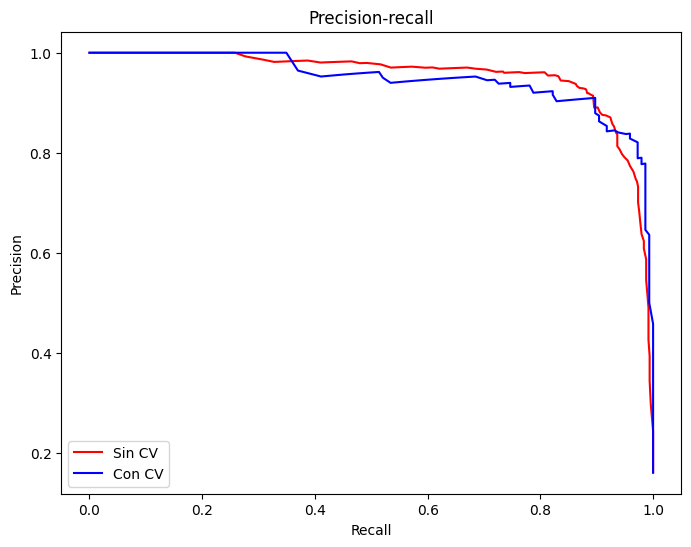

In [ ]:
plt.subplots(1, figsize=(8,6))
plt.title('Precision-recall')
plt.plot(sin_cv_r, sin_cv_p, color = "red", label = "Sin CV")
plt.plot(con_cv_r, con_cv_p, color = "blue", label = "Con CV")
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend()
plt.show()


In [ ]:
print('auc para RF con CV: ', auc(con_cv_r, con_cv_p))
print('auc para RF sin CV: ', auc(sin_cv_r, sin_cv_p))
print('Diferencia de  auc: ', auc(con_cv_r, con_cv_p) - auc(sin_cv_r, sin_cv_p))

auc para RF con CV:  0.9477356888921465
auc para RF sin CV:  0.9546578507511997
Diferencia de  auc:  -0.006922161859053144


##Conclusión

Al igual que lo que paso con las curvas ROC-AUC y los reportes de clasificación, ambos modelos presentan valores muy similares en la curva Precision-recall, con diferencias casi despreciables. Por eso podemos concluir que ambos modelos son muy buenos predictores y ambos se comportan de manera muy similar.

La gran diferencia la tenemos en el valor de recall que es nuestra variable objetivo, donde mejoramos de 84% a 86%, por lo que **recomendamos utilizar el modelo con CV** para poder detectar la mayor cantidad posible de personas que abandonarían el banco por más que eso represente tener un leve incremento al tener más falsos positivos y por ende mayores costes por mantener clientes que igual permanecerían.